In [26]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.patches as patches
plt.rcParams['figure.dpi']=150

In [35]:
#Adjust main parameters here
num_steps = 5000000 #number of steps in the simulation
ns = 100 # number of samples to visualise and plot
box_size = 80 # length of the simulation box
mini_size = 20 # length of inner starting box

In [36]:
# calculate the entropy and density using Stirling's approximation 
#NB: this is simulated across all values of n_box, not just the ones encountered during the simulation!!
# hence the use of the for loop across all possible values of box occupancy (ignoring 0 and nmin since they give diverging log values)
def cal_en():
    sys_en = []
    surr_en = []
    tot_en = []
    for i in range(1,nmin):
        nm_sys = i
        nm_surr = nmin - nm_sys
        vc_sys = nm_surr
        vc_surr = nbox - nmin - nm_surr
        sys_en_l = nmin*np.log(nmin) -nm_sys*np.log(nm_sys) -vc_sys*np.log(vc_sys)
        sys_en.append(sys_en_l)
        surr_en_l = (nbox-nmin)*np.log(nbox-nmin) -nm_surr*np.log(nm_surr) -vc_surr*np.log(vc_surr)
        surr_en.append(surr_en_l)
        tot_en.append(sys_en_l + surr_en_l)
    fig2, (axsb1,axsb2,axsb3) = plt.subplots(3, sharex = True, figsize = (6,8))
    plt.xlim([0,nmin])
    axsb1.plot(tot_en)
    axsb1.set_title("Total entropy")
    plt.xlabel("Number of particles in box")
    axsb2.plot(sys_en)
    axsb2.set_title("Box entropy")
    plt.xlabel("Number of particles in box")
    axsb3.plot(surr_en)
    axsb3.set_title("Entropy of surroudings")
    plt.xlabel("Number of particles in box")
    plt.show()

In [37]:
class Simulation():
    def __init__(self, run_nums, box_size, mini_size):
        self.toten = []
        self.rsys = []
        self.rsurr = []
        self.maps = []
        self.run_nums = run_nums
        self.box_size = box_size
        self.mini_size = mini_size
        #set up simulation box
        self.nbox = box_size**2
        self.box = np.zeros((box_size,box_size))
        self.nmin = mini_size**2
        lb = int((box_size-mini_size)/2)
        ub = int((box_size+mini_size)/2)
        self.box[lb:ub, lb:ub] = 1
    
     # calculate the density and entropy using Stirling's approximation
    def cal_den(self):
        nm_sys = np.sum(self.box[lb:ub,lb:ub])
        nm_surr = nmin - nm_sys
        vc_sys = nm_surr
        vc_surr = nbox - nmin - nm_surr
        sys_en = nmin*np.log(nmin) -nm_sys*np.log(nm_sys) -vc_sys*np.log(vc_sys)
        surr_en = (nbox-nmin)*np.log(nbox-nmin) -nm_surr*np.log(nm_surr) -vc_surr*np.log(vc_surr)
        tot_en = sys_en+surr_en
        r_sys = nm_sys/mini_size**2
        r_surr = nm_surr/(nbox-mini_size**2)
        return (tot_en, r_sys, r_surr)
    
    def run(self):
        self.has_run = False # this is just a mechanism to avoid taking the log of 0
        for i in range(num_steps):
            sq_a = np.floor(np.random.rand(2)*self.box_size).astype(int)
            while True:
                mv = np.floor(np.random.rand(2)*2).astype(int)*2 - 1
                sq_b = sq_a + mv
                if (all(sq_b > 0) and all(sq_b != self.box_size)):
                    break
            v_a = self.box[sq_a[0]][sq_a[1]]
            v_b = self.box[sq_b[0]][sq_b[1]]
            if v_a != v_b:
                self.box[sq_a[0]][sq_a[1]] = v_b
                self.box[sq_b[0]][sq_b[1]] = v_a
                self.cal_den()
                self.has_run = True

            if i%int(num_steps/self.run_nums) == 0:
                if self.has_run:
                    tot_en, r_sys, r_surr = self.cal_den()
                    self.toten.append(tot_en)
                    self.rsys.append(r_sys)
                    self.rsurr.append(r_surr)
                copy = np.copy(self.box)
                self.maps.append(tuple(copy))
        return None
    
    def access(self,j):
        #print(self.maps[j])
        self.fig, ax = plt.subplots()
        plt.xticks([])
        plt.yticks([])
        ax.imshow(self.maps[j])
        rect = patches.Rectangle((lb-0.5, lb-0.5), mini_size, mini_size, linewidth=2,edgecolor='r', facecolor = 'none')
        ax.add_patch(rect)
        plt.show()
        
    def plot_sim(self):
        fig1, (axsa1,axsa2) = plt.subplots(2, sharex = True, figsize = (6,4))
        axsa1.plot(self.toten)
        fig1.suptitle("Evolution of entropy and density")
        plt.xlabel("Simulation time")
        axsa2.plot(self.rsurr)
        plt.plot(self.rsys)
        plt.ylabel("Density")
        plt.xlabel("Simulation time")
        plt.show()
        

interactive(children=(IntSlider(value=0, description='j', max=99), Output()), _dom_classes=('widget-interact',…

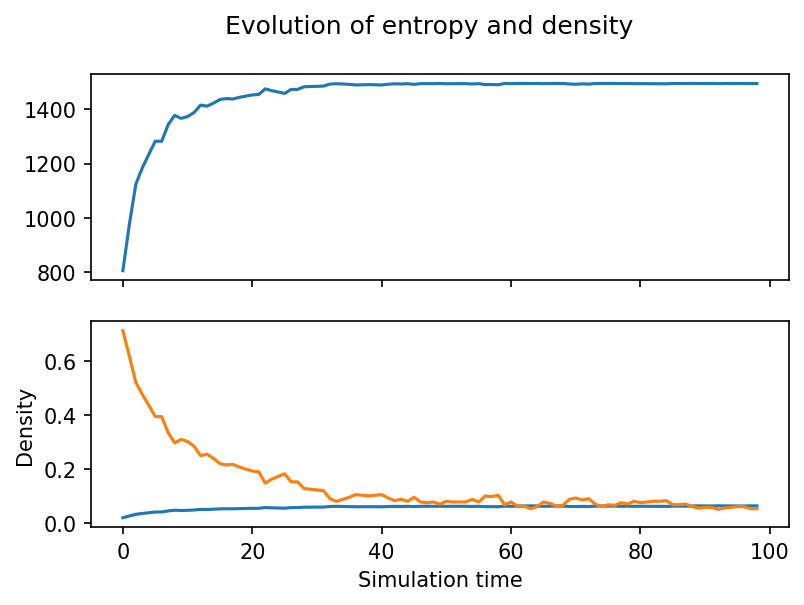

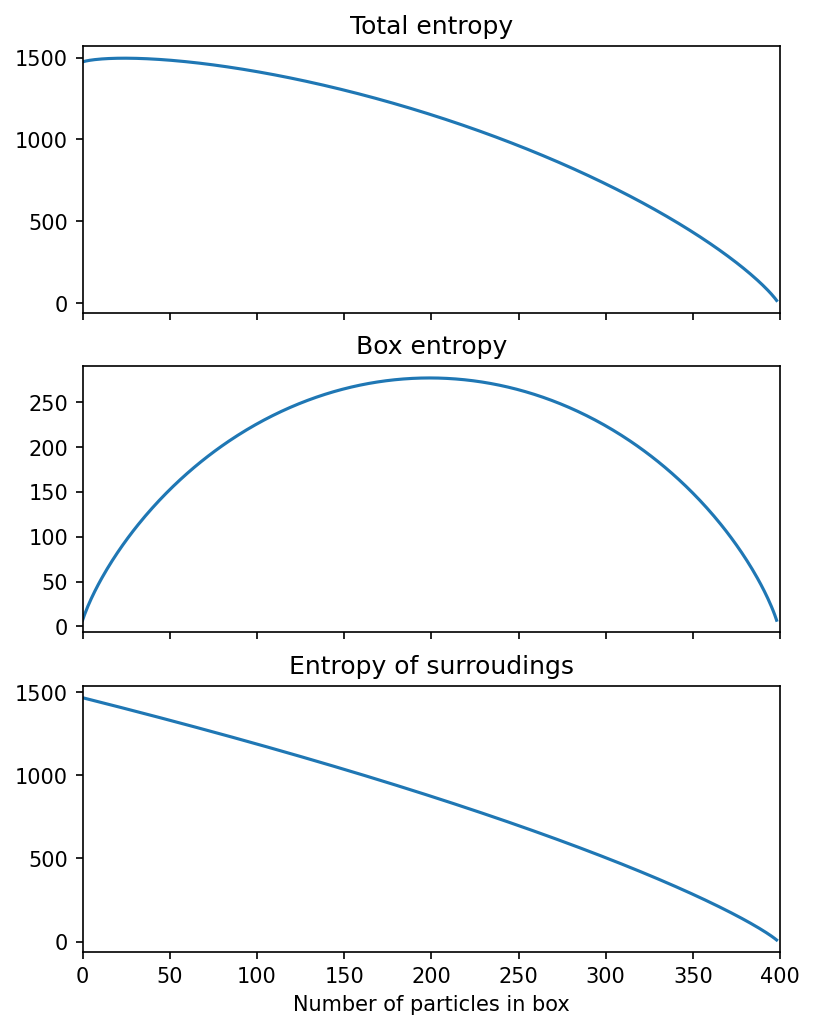

In [38]:
sim = Simulation(ns, box_size, mini_size)
sim.run()
interact(sim.access, j=widgets.IntSlider(min=0, max=ns-1, step=1, value=0))
sim.plot_sim()
cal_en()